In [2]:
# import dependencies
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# create a connection to the postgresql database
connection = pg.connect("host='127.0.0.1' dbname=Employee_db user=postgres password='M612a786b'")
# create dataframes for salaries and title
salaries = pd.read_sql_query('select * from salaries',con=connection)
title = pd.read_sql_query('select * from titles',con=connection)

In [3]:
# create a group by function
salary_title = pd.merge(title,salaries,on=['emp_no'] )
salary_by_title=salary_title.groupby('title').mean()
salary_by_title.reset_index()

,title,emp_no,salary
0,Assistant Engineer,251495.398533,48493.204786
1,Engineer,252943.159987,48539.781423
2,Manager,110780.833333,51531.041667
3,Senior Engineer,253034.375949,48506.751806
4,Senior Staff,253423.367183,58503.286614
5,Staff,253399.240672,58465.271904
6,Technique Leader,251708.951052,48580.505772


In [4]:
salary_by_title.index

Index(['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer',
       'Senior Staff', 'Staff', 'Technique Leader'],
      dtype='object', name='title')

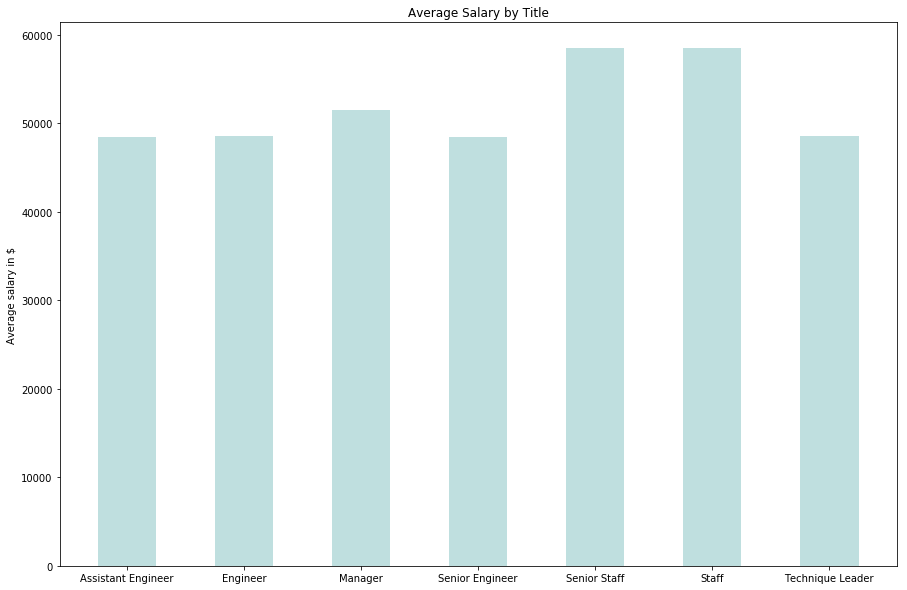

In [10]:
# define x axis, y axis, width and fig size
x_axis=np.arange(7)
y_axis=round(salary_by_title.salary,0)
width = 0.5
fig,ax = plt.subplots(figsize=(15,10))

# create barchart using x values, y values
plt.bar(x_axis, y_axis, color='teal', alpha=0.25,width=width, align='center')

# define tick locations and values for x axis, y axis and title
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, salary_by_title.index)
plt.ylabel('Average salary in $')
plt.title('Average Salary by Title')
plt.show()